## Taller 4

### Nicolás Meneses Cortés - 201415808

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np

Populating the interactive namespace from numpy and matplotlib


#### Ejemplo 1

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


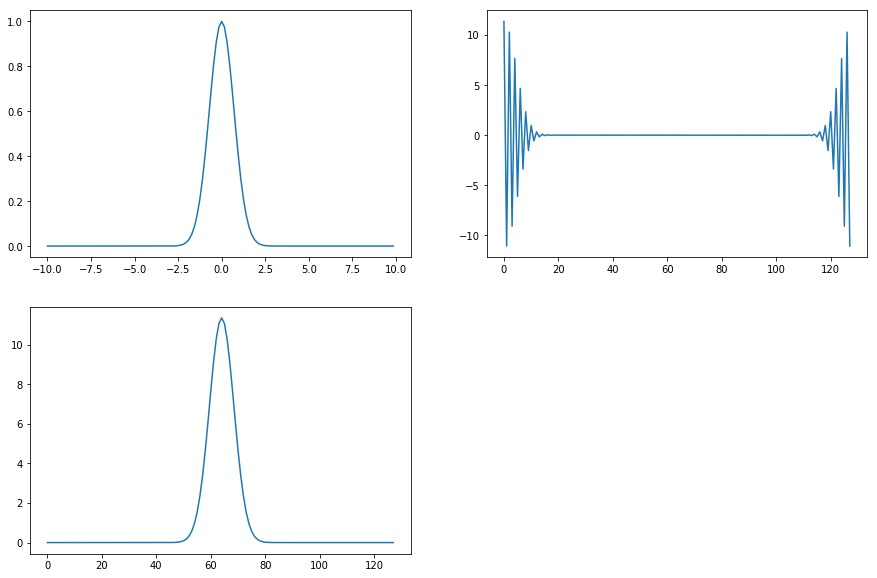

In [2]:
L = 20
n = 128
x2 = np.linspace(-L/2,L/2,n+1)
x = np.array(x2[0:n])
u = np.exp((-x)*x)
ut = np.fft.fft(u)
utshift = np.fft.fftshift(ut)

figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(x,u)
plt.subplot(2,2,2)
plt.plot((ut))
plt.subplot(2,2,3)
plt.plot((np.abs(utshift)))

#### Ejemplo 2

(-1.5, 1.5)

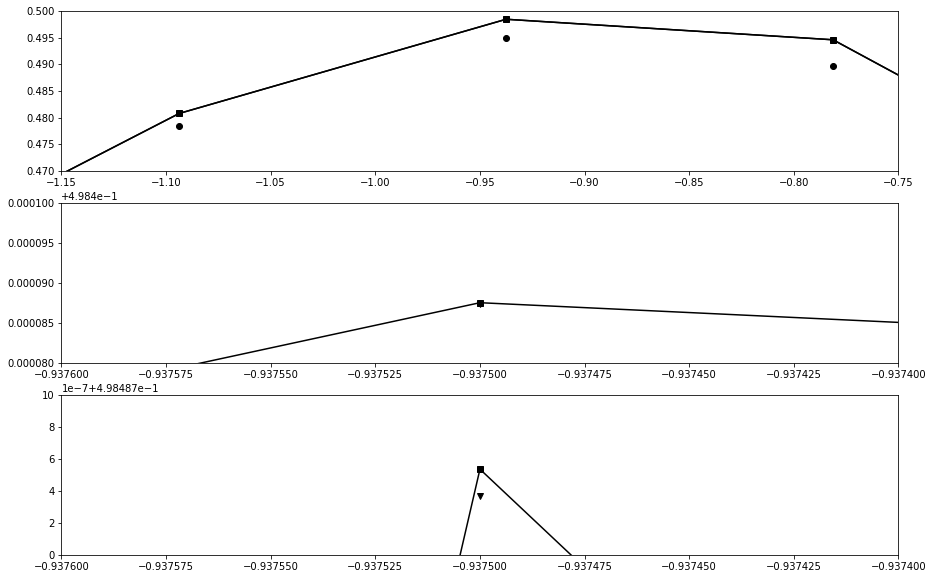

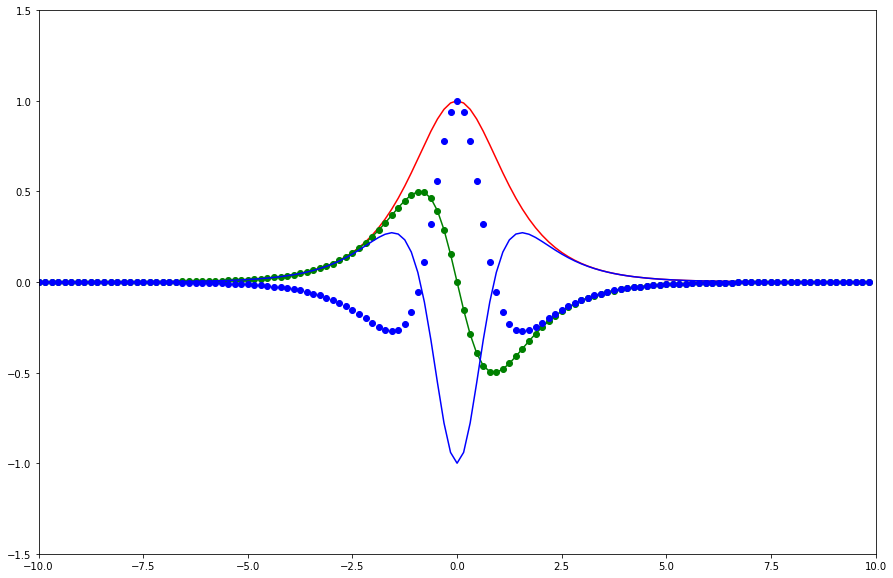

In [3]:
L = 20
n = 128
 
x2 = np.linspace(-L/2,L/2,n+1)
x = np.array(x2[0:n])
dx = x[1]-x[0]
u = 1/np.cosh(x)
ut = np.fft.fft(u)
k1 = (np.arange(0, (n/2)))*((2*np.pi)/L)
k2 = (np.arange((-n/2),0))*((2*np.pi)/L)
k = np.concatenate((k1, k2))

ut1 = 1j*k*ut
ut2 = -k*k*ut
u1 = real(np.fft.ifft(ut1))
u2 = real(np.fft.ifft(ut2))
u1exact = (-1/np.cosh(x))*(np.tanh(x))
u2exact = (-1/np.cosh(x))-(-2/(np.cosh(x)**3))

ux = np.zeros(n)
for i in range(n-1):
    ux[i] = (u[i+1]-u[i-1])/(2*dx)
ux[0] = (-3*u[0]+4*u[1]-u[2])/(2*dx)
ux[n-1] = (3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx)

ux2 = np.zeros(n)

for i in range(n-2):
    ux2[i] = (-u[i+2]+8*u[i+1]-8*u[i-1]+u[i-2])/(2*dx)
ux2[0] = (-3*u[0]+4*u[1]-u[2])/(2*dx)
ux2[1] = (-3*u[1]+4*u[2]-u[3])/(2*dx)
ux2[n-2] = (3*u[n-2]-4*u[n-3]+u[n-4])/(2*dx)
ux2[n-1] = (3*u[n-1]-4*u[n-2]+u[n-3])/(2*dx)

figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(x,u1exact, '-ks', x,u1, 'k', x, ux, 'ko', x, ux2, '*k')
ax = plt.gca()
ax.set_xlim([-1.15,-0.75])
ax.set_ylim([0.47, 0.5])
plt.subplot(3,1,2)
plt.plot(x,u1exact, '-ks', x,u1, 'kv', x, ux, 'ko', x, ux2, '*k')
ax = plt.gca()
ax.set_xlim([-0.9376,-0.9374])
ax.set_ylim([0.49848, 0.49850])
plt.subplot(3,1,3)
plt.plot(x,u1exact, '-ks', x,u1, 'kv', x, ux, 'ko', x, ux2, '*k')
ax = plt.gca()
ax.set_xlim([-0.9376,-0.9374])
ax.set_ylim([0.498487, 0.498488])

figure(figsize=(15,10))
plt.plot(x,u, 'r', x, u1, 'g', x,u1exact, 'go', x,u2, 'b', x, u2exact, 'bo')
ax = plt.gca()
ax.set_xlim([-10,10])
ax.set_ylim([-1.5, 1.5])

#### Ejemplo 3

(-10, 10)

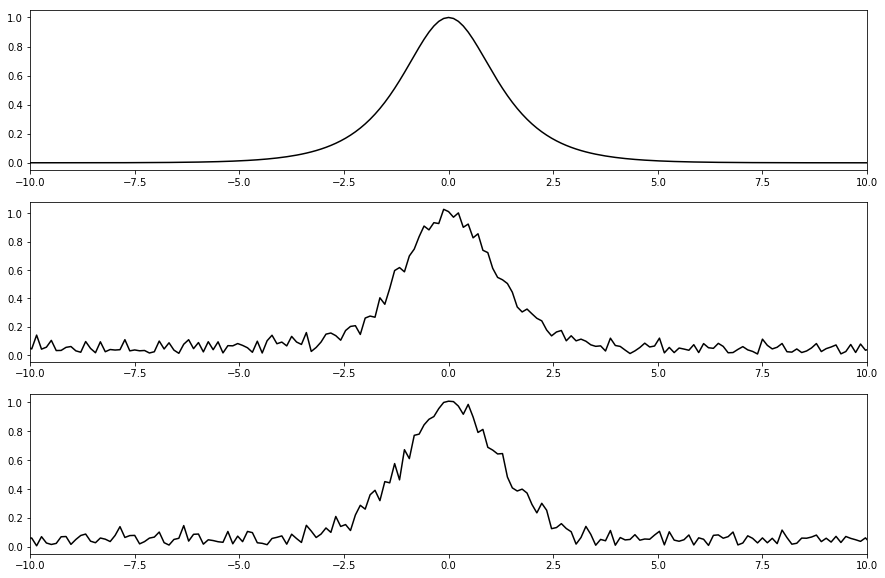

In [4]:
L = 30
n = 512
t2 = np.linspace(-L,L,n+1)
t = np.array(t2[0:n])
k1 = (np.arange(0, (n/2)))*((2*np.pi)/(2*L))
k2 = (np.arange((-n/2),0))*((2*np.pi)/(2*L))
k = np.concatenate((k1, k2))

u = 1/np.cosh(t)
noise = 1
ut = np.fft.fft(u)
utn = ut+noise*(np.random.randn(n)+1j*np.random.randn(n))
un = np.fft.ifft(utn)
noise2 = 100
ut2 = np.fft.fft(u)
utn2 = ut2+noise*(np.random.randn(n)+1j*np.random.randn(n))
un2 = np.fft.ifft(utn2)


figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(t,u,'k')
ax = plt.gca()
ax.set_xlim([-10,10])
plt.subplot(3,1,2)
plt.plot(t, np.abs(un), 'k')
ax = plt.gca()
ax.set_xlim([-10,10])
plt.subplot(3,1,3)
plt.plot(t, np.abs(un2), 'k')
ax = plt.gca()
ax.set_xlim([-10,10])

Text(0,0.5,'|ut|/max|ut|')

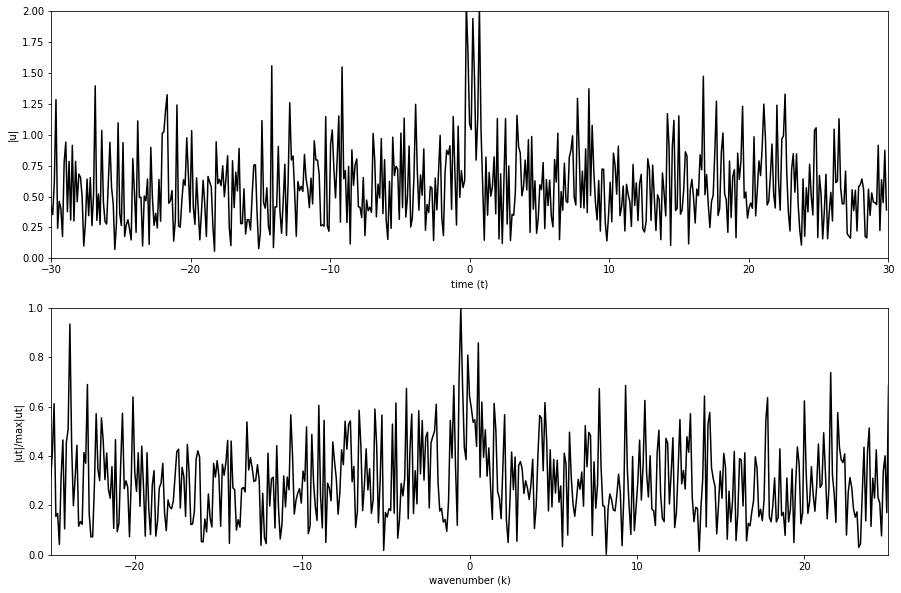

In [5]:
#Continua ejemplo

noise = 10
ut = np.fft.fft(u)
utn = ut+noise*(np.random.randn(n)+1j*np.random.randn(n))
un = np.fft.ifft(utn)
p1 = np.abs(np.fft.fftshift(utn))

figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(t,np.abs(un),'k')
ax = plt.gca()
ax.set_xlim([-30,30])
ax.set_ylim([0,2])
plt.xlabel('time (t)')
plt.ylabel('|u|')
plt.subplot(2,1,2)
plt.plot(np.fft.fftshift(k),
         p1/np.max(p1),
         'k')
ax = plt.gca()
ax.set_xlim([-25,25])
ax.set_ylim([0,1])
plt.xlabel('wavenumber (k)')
plt.ylabel('|ut|/max|ut|')

Text(0,0.5,'|ut|')

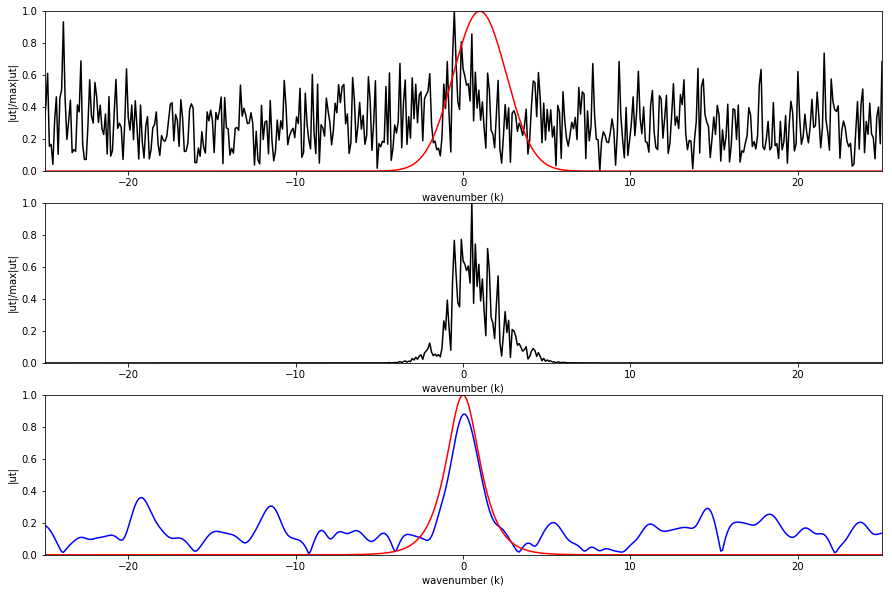

In [6]:
#Continua ejemmplo

filt = np.exp((-0.2)*((k-1)**2))
unft = filt*utn
unf = np.fft.ifft(unft)
p2 = np.abs(np.fft.fftshift(unft))
p3 = np.abs(np.fft.fftshift(filt))

figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(np.fft.fftshift(k),
         p1/np.max(p1),
         'k',
        np.fft.fftshift(k), p3/np.max(p3), 'r')
ax = plt.gca()
ax.set_xlim([-25,25])
ax.set_ylim([0,1])
plt.xlabel('wavenumber (k)')
plt.ylabel('|ut|/max|ut|')
plt.subplot(3,1,2)
plt.plot(np.fft.fftshift(k),p2/np.max(p2),'k')
ax = plt.gca()
ax.set_xlim([-25,25])
ax.set_ylim([0,1])
plt.xlabel('wavenumber (k)')
plt.ylabel('|ut|/max|ut|')
plt.subplot(3,1,3)
plt.plot(np.fft.fftshift(k), np.abs(unf), 'b',
        np.fft.fftshift(k), np.abs(u), 'r')
ax = plt.gca()
ax.set_xlim([-25,25])
ax.set_ylim([0,1])
plt.xlabel('wavenumber (k)')
plt.ylabel('|ut|')


Text(0,0.5,'|ut|')

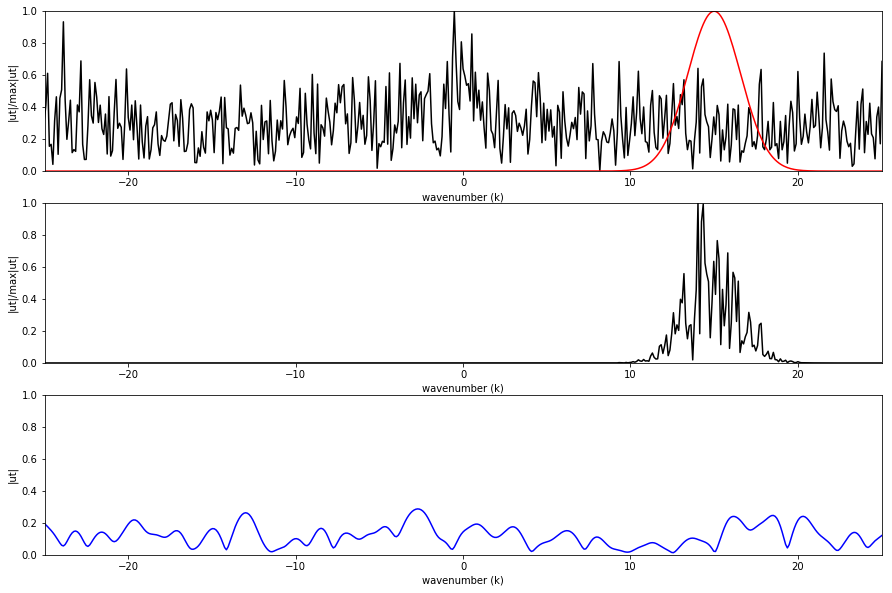

In [7]:
# continua ejemplo

filt = np.exp((-0.2)*((k-15)**2))
unft = filt*utn
unf = np.fft.ifft(unft)
p2 = np.abs(np.fft.fftshift(unft))
p3 = np.abs(np.fft.fftshift(filt))

figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(np.fft.fftshift(k),
         p1/np.max(p1),
         'k',
        np.fft.fftshift(k), p3/np.max(p3), 'r')
ax = plt.gca()
ax.set_xlim([-25,25])
ax.set_ylim([0,1])
plt.xlabel('wavenumber (k)')
plt.ylabel('|ut|/max|ut|')
plt.subplot(3,1,2)
plt.plot(np.fft.fftshift(k),p2/np.max(p2),'k')
ax = plt.gca()
ax.set_xlim([-25,25])
ax.set_ylim([0,1])
plt.xlabel('wavenumber (k)')
plt.ylabel('|ut|/max|ut|')
plt.subplot(3,1,3)
plt.plot(np.fft.fftshift(k), np.abs(unf), 'b')
ax = plt.gca()
ax.set_xlim([-25,25])
ax.set_ylim([0,1])
plt.xlabel('wavenumber (k)')
plt.ylabel('|ut|')

#### Ejemplo 4

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


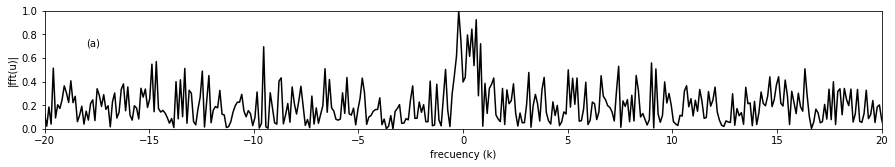

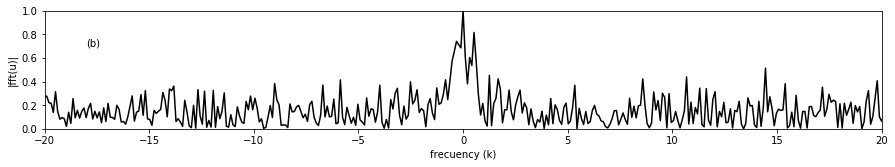

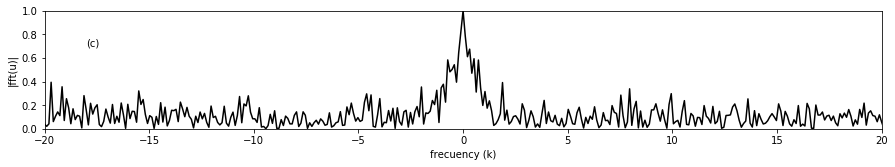

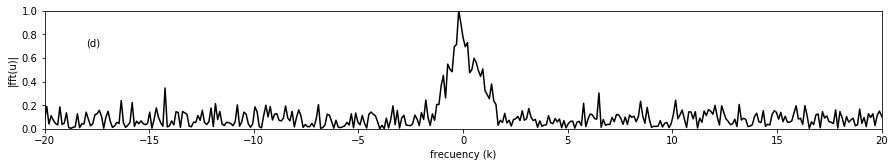

In [8]:
L = 30
n = 512
t2 = np.linspace(-L,L,n+1)
t = np.array(t2[0:n])
k1 = (np.arange(0, (n/2)))*((2*np.pi)/(2*L))
k2 = (np.arange((-n/2),0))*((2*np.pi)/(2*L))
k = np.concatenate((k1, k2))
ks = np.fft.fftshift(k)
noise = 10

labels = ['(a)','(b)', '(c)', '(d)']
realize = [0,1,2,5,10]
for jj in range(1,5):
    u = 1/np.cosh(t)
    ut = np.fft.fft(u)
    utn = np.zeros((10,n))
    ave = np.zeros((1,n))
    dat = np.zeros((10,n))
    un = np.zeros((10,n))
    for j in range(0,realize[jj]):
        utn[j,:] = ut+noise*(np.random.randn(n)+1j*np.random.randn(n))
        ave = ave+utn[j,:]
        x = np.max(np.array(np.abs(utn[j,:])))
        dat[j,:] = (np.abs(np.fft.fftshift(utn[j,:])))/(x)
        un[j,:] = np.fft.ifft(utn[j,:])
    ave = np.abs(np.fft.fftshift(ave))/realize[jj]
    ave = np.array(ave[0,:])
    p1 = ave/np.max(ave)
    
    figure(figsize=(15,10))
    plt.subplot(4,1,jj)
    plt.plot(ks,p1, 'k')
    ax = plt.gca()
    ax.set_xlim([-20,20])
    ax.set_ylim([0,1])
    plt.text(-18,0.7, labels[jj-1])
    plt.xlabel('frecuency (k)')
    plt.ylabel('|fft(u)|')
        

Text(0,0.5,'|fft(u)|')

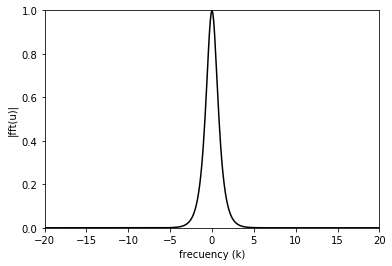

In [9]:
#Continua ejemplo
plt.plot(ks,np.abs(np.fft.fftshift(ut))/np.max(np.abs(ut)), 'k')
ax = plt.gca()
ax.set_xlim([-20,20])
ax.set_ylim([0,1])
plt.xlabel('frecuency (k)')
plt.ylabel('|fft(u)|')

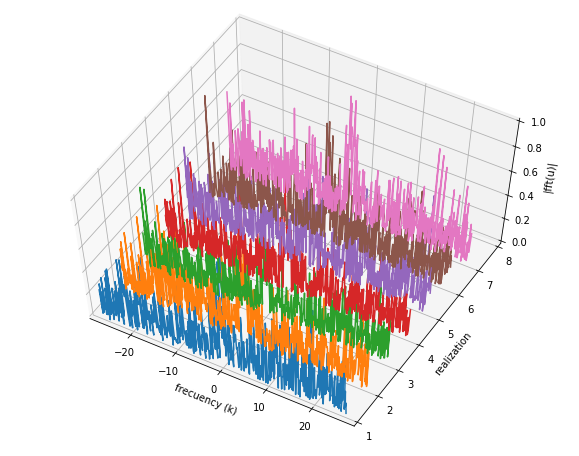

In [10]:
#Continua ejemplo
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
fig.set_size_inches(10,8)
ax = fig.add_subplot(111, projection='3d')
for i in range(0,7):
    ax.plot(ks,dat[i,:],i+1, zdir= 'y')
ax.set_xlim([-28,28])
ax.set_ylim([1,8])
ax.set_zlim([0,1])
ax.set_xlabel('frecuency (k)')
ax.set_ylabel('realization')
ax.set_zlabel('|fft(u)|')
ax.view_init(elev=60)
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


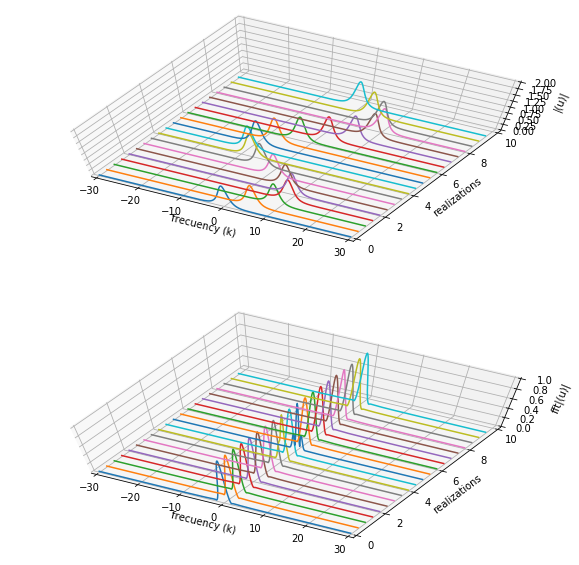

In [11]:
#Continua ejemplo
slic = np.linspace(0,10.5,21,endpoint=False)
[T,S] = meshgrid(t,slic)
[K,S] = meshgrid(k,slic)

U = (1/np.cosh(T-10*np.sin(S)))*np.exp(1j*0*T)
filt = np.exp((-0.2)*((k-0)**2))
unft = filt*U
unf = np.fft.ifft(unft)
p1 = np.abs(np.fft.fftshift(unf))

fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(211, projection='3d')
for i in range(0,20):
    ax.plot(T[i],S[i],U[i], zdir= 'z')
ax.set_xlim([-30,30])
ax.set_ylim([0,10])
ax.set_zlim([0,2])
ax.set_xlabel('frecuency (k)')
ax.set_ylabel('realizations')
ax.set_zlabel('|(u)|')
ax.view_init(elev=70)
ay = fig.add_subplot(212, projection='3d')
for i in range(0,20):
    ay.plot(T[i],S[i],p1[i]/np.max(p1[i]), zdir= 'z')
ay.set_xlim([-30,30])
ay.set_ylim([0,10])
ay.set_zlim([0,1])
ay.set_xlabel('frecuency (k)')
ay.set_ylabel('realizations')
ay.set_zlabel('fft|(u)|')
ay.view_init(elev=70)
plt.show()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:14: ComplexWarning: Casting complex values to real discards the imaginary part


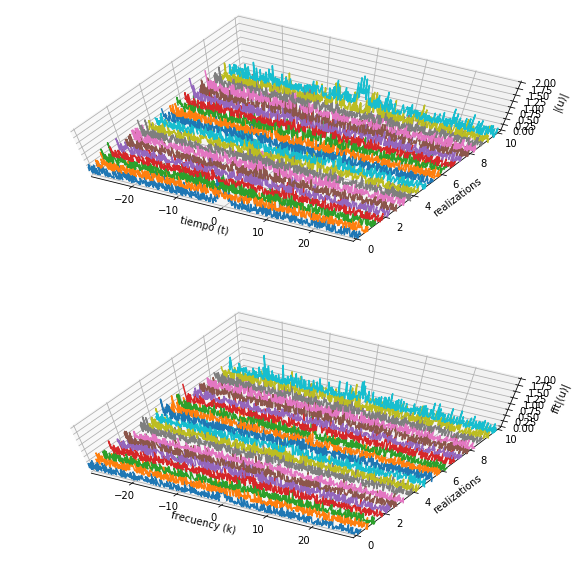

In [12]:
Ut = np.zeros((21,n))
Kp = np.zeros((21,n))  
Utp = np.zeros((21,n))
Utn = np.zeros((21,n))
Utnp = np.zeros((21,n))
Utn = np.zeros((21,n))
Un = np.zeros((21,n))
for j in range(0,20):    
    Ut[j,:] = np.fft.fft(U[j,:])
    Kp[j,:] = np.fft.fftshift(K[j,:])
    Utp[j,:] = np.fft.fftshift(Ut[j,:])
    Utn[j,:] = Ut[j,:]+noise*(np.random.randn(n)+1j*np.random.randn(n))
    Utnp[j,:] = np.fft.fftshift(Utn[j,:])/np.max(np.abs(Utn[j,:]))
    Un[j,:] = np.fft.ifft(Utn[j,:])
    
fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(211, projection='3d')
for i in range(0,20):
    ax.plot(T[i,:],S[i,:],np.abs(Un[i,:]), zdir= 'z')
ax.set_xlim([-28,28])
ax.set_ylim([0,10])
ax.set_zlim([0,2])
ax.set_xlabel('tiempo (t)')
ax.set_ylabel('realizations')
ax.set_zlabel('|(u)|')
ax.view_init(elev=70)
ay = fig.add_subplot(212, projection='3d')
for i in range(0,20):
    ay.plot(T[i,:],S[i,:],np.abs(Utnp[i,:]), zdir= 'z')
ay.set_xlim([-28,28])
ay.set_ylim([0,10])
ay.set_zlim([0,2])
ay.set_xlabel('frecuency (k)')
ay.set_ylabel('realizations')
ay.set_zlabel('fft|(u)|')
ay.view_init(elev=70)
plt.show()

Text(0,0.5,'|fft (u)|')

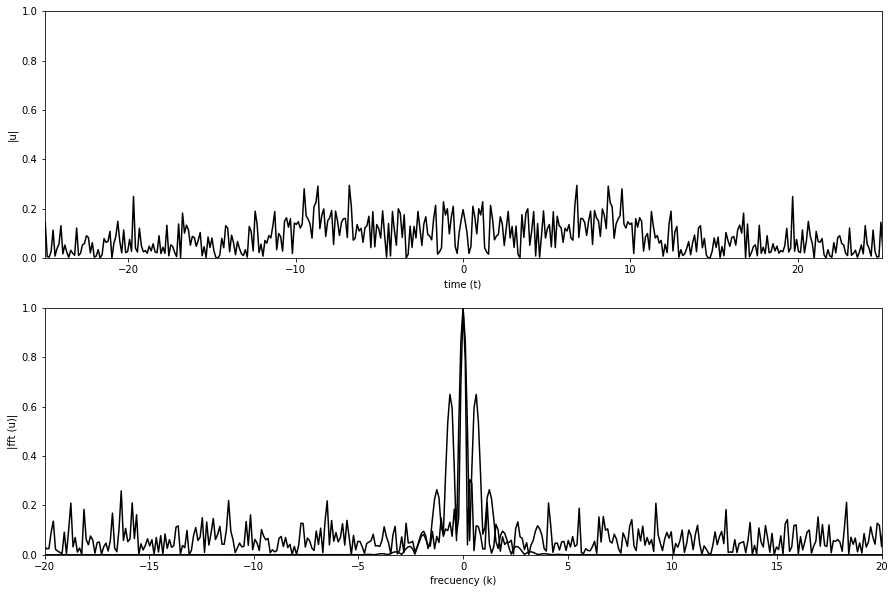

In [13]:
#Continua el ejemplo
Uave = np.zeros((1,n))
Utave = np.zeros((1,n))

for j in range(0,20):
    Uave = Uave+Un[j,:]
    Utave = Utave+Utn[j,:]
Uave = Uave/21
Utave =  np.fft.fftshift(Utave)/21

figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(t,np.abs(Uave[0]), 'k')
ax = plt.gca()
ax.set_xlim([-25,25])
ax.set_ylim([0,1])
plt.xlabel('time (t)')
plt.ylabel('|u|')
plt.subplot(2,1,2)
plt.plot(ks,np.abs(Utave[0])/np.max(np.abs(Utave[0])), 'k')
plt.plot(ks,np.abs(np.fft.fftshift(Ut[1,:]))/np.max(np.abs(Ut[1,:])), 'k')
ax = plt.gca()
ax.set_xlim([-20,20])
ax.set_ylim([0,1])
plt.xlabel('frecuency (k)')
plt.ylabel('|fft (u)|')

### Ejemplo propio

##### Filtrado de una señal de auidio a partir de los métodos explorados en los ejemplos anteriores. 

Se toma pedazo de una canción compuesta por piano y voz, se pretende filtrar el audio para dejar solo la voz. se toma como referencia la frecuencia del sonido de los pianos que está alrededor de 440.

In [3]:
import scipy.io.wavfile as wave 
import IPython.display as ipd
ipd.Audio('audio.wav')

archivo = 'audio.wav'
muestreo, sonido = wave.read(archivo)
ipd.Audio(real(sonido[:,1]),rate=muestreo)

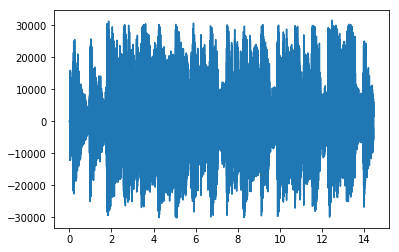

In [4]:
audio = sonido[:,1]
long = len(audio)
t = long/muestreo
t2 = np.linspace(0,t,long)
plt.plot(t2,audio)

Después de obtener la señal de onda del sonido, se reliza la discretización y se crean los componentes de frecuencia para la FFT. 

In [5]:
L = t2[-1]-t2[0]
n = len(t2)
k1 = (np.arange(1, (n/2)))*((2*np.pi)/(2*L))
k2 = (np.arange((-n/2),0))*((2*np.pi)/(2*L))
k = np.concatenate((k1, k2))

Ahora bien conociendo los valores de las frecuencias en los que oscila la señal de audio se filtraran con las ecuación de la sección 12.2 $$F(k)=exp(-\tau(k-k_o)^2)$$ en donde se tendrá una frecuencia central de $K_o = 440$ que es la de un piano, con el fin de dejar la voz del cantante unicamente.

In [6]:
filt = 1-np.exp(-0.1*10**-8*(k-440)**2)
un = np.fft.fft(audio)
unft = filt*un
unf = np.fft.ifft(unft)

A continuación, se presenta la canción filtrada:

In [7]:
#wave.write('test.wav', muestreo, unf.astype(sonido.dtype))
ipd.Audio(real(unf),rate=muestreo)

Se puede evidenciar que efectivametne se escucha un poco más la voz y se atenua el piano de fondo. 

Ahora bien se realizará un segundo ejemplo con piano y voz, en este caso se tiene ruido de aplausos y gritos de un concierto. Igual que en el caso anterior se pretende filtrar la señal de tal manera que unicamente quede la voz. Se ultiza la misma frecuencia de 440 empleada en el ejemplo anterior. 

In [8]:
archivo = 'auidio2.wav'
muestreo, sonido = wave.read(archivo)
ipd.Audio(real(sonido[:,1]),rate=muestreo)

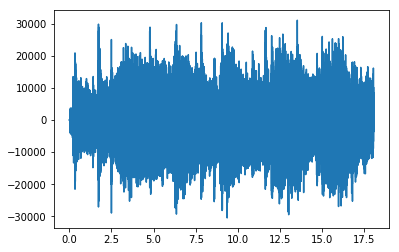

In [9]:
audio2 = sonido[:,1]
long2 = len(audio2)
t1 = long2/muestreo
t12 = np.linspace(0,t1,long2)
plt.plot(t12,audio2)

In [10]:
L2 = t12[-1]-t12[0]
n2 = len(t12)
k1x = (np.arange(1, (n2/2)))*((2*np.pi)/(2*L2))
k2x = (np.arange((-n2/2),0))*((2*np.pi)/(2*L2))
kx = np.concatenate((k1x, k2x))

In [12]:
filt = 1-np.exp(-0.1*10**-8*(k-440)**2)
un = np.fft.fft(audio2)
#unft = filt*un
#unf = np.fft.ifft(unft)

In [ ]:
ipd.Audio(real(unf2),rate=muestreo)